In [1]:
import pandas as pd
import sys
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

from visualizations import (
    plot_label_distribution,
    plot_most_common_words,
    plot_histograms,
    plot_most_common_words_per_label,
)
from preprocessing import add_new_cols

DATA_PATH = "../data"

## **TwiBot-20**


### **Tweets**

**Description**
- ```ID```: the ID from Twitter identifying the user.
- ```profile```: the profile information obtained from Twitter API.
- ```tweet```: the recent 200 tweets of this user.
- ```neighbor```: the random 20 followers and followings of this user.
- ```domain```: the domain of this user and the domains include politics, business, entertainment and sports.
- ```label```: the label of this user and '1' means it is a bot while '0' means it is a human.

In [2]:
train = pd.read_json(DATA_PATH + "/Twibot20/tweets/train.json")

In [3]:
train.head()

,ID,profile,tweet,neighbor,domain,label
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8278 non-null   int64 
 1   profile   8278 non-null   object
 2   tweet     8223 non-null   object
 3   neighbor  7524 non-null   object
 4   domain    8278 non-null   object
 5   label     8278 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 388.2+ KB


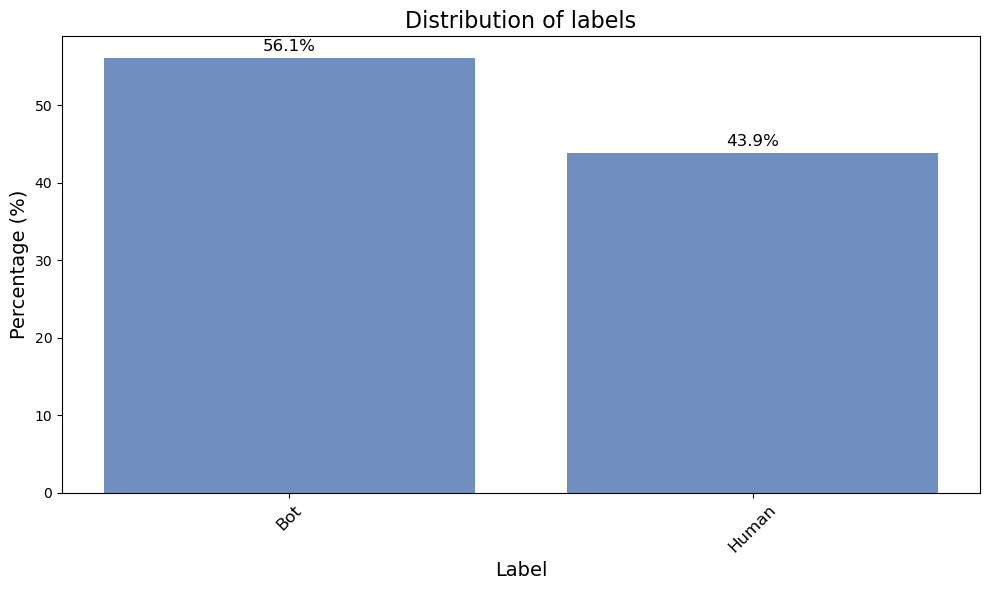

In [5]:
plot_label_distribution(train)

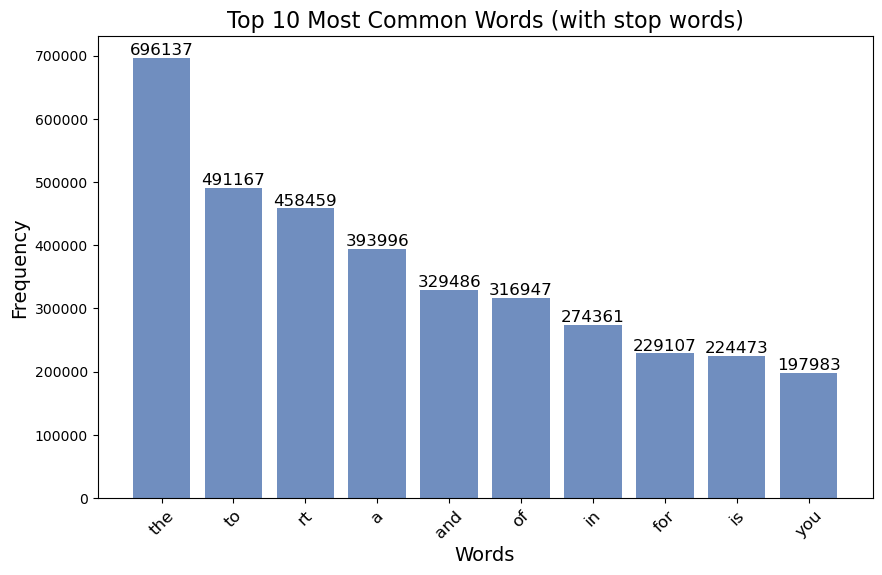

In [6]:
plot_most_common_words(train, include_stopwords=True)

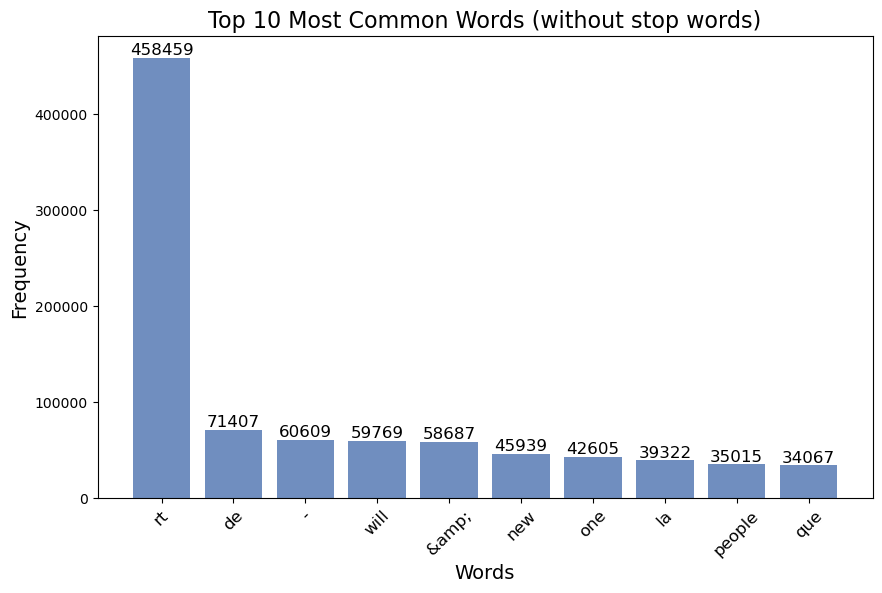

In [7]:
plot_most_common_words(train, include_stopwords=False)

In [8]:
train = add_new_cols(train)

In [9]:
train.head()

,ID,profile,tweet,neighbor,domain,label,avg_word_count,avg_character_count,avg_hashtag_count,avg_mention_count,avg_link_count,avg_emoji_count,avg_positive_word_count,avg_negative_word_count
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0,24.565000,166.275000,0.0,0.01,0.0,0.265000,0.935000,0.240000
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0,20.770000,139.155000,0.0,0.00,0.0,0.175000,0.680000,0.485000
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0,24.530000,166.195000,0.0,0.00,0.0,0.075000,0.510000,0.475000
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1,13.579545,85.761364,0.0,0.00,0.0,0.602273,0.318182,0.545455


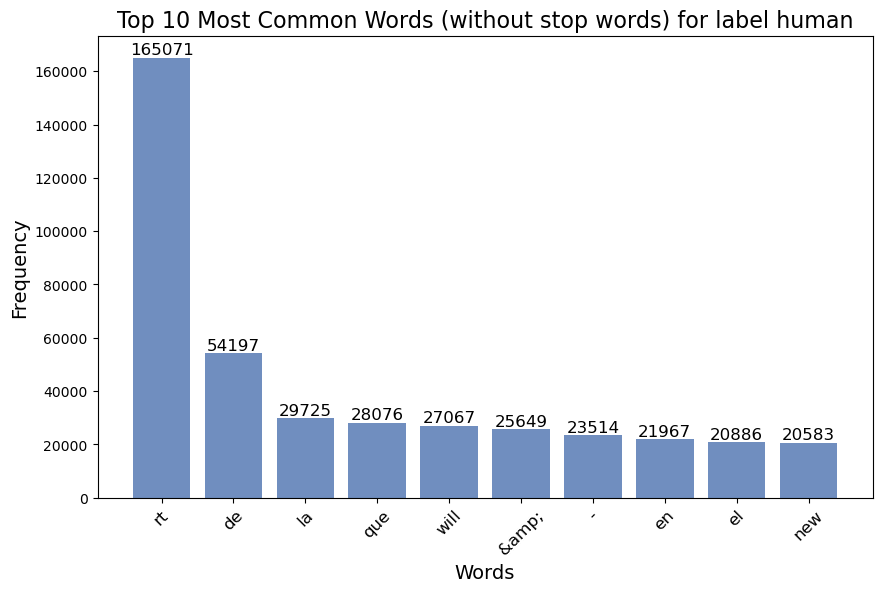

In [10]:
plot_most_common_words_per_label(train, label="human")

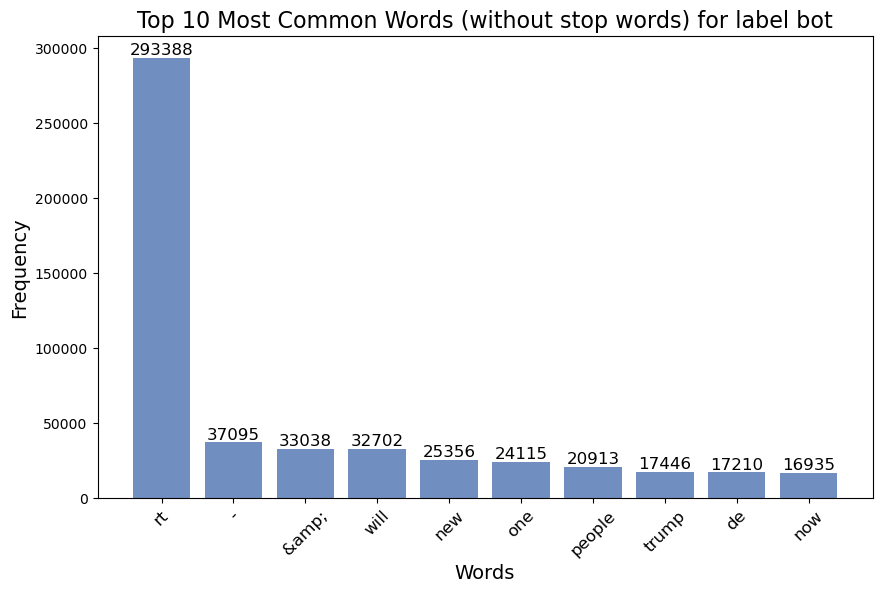

In [11]:
plot_most_common_words_per_label(train, label="bot")

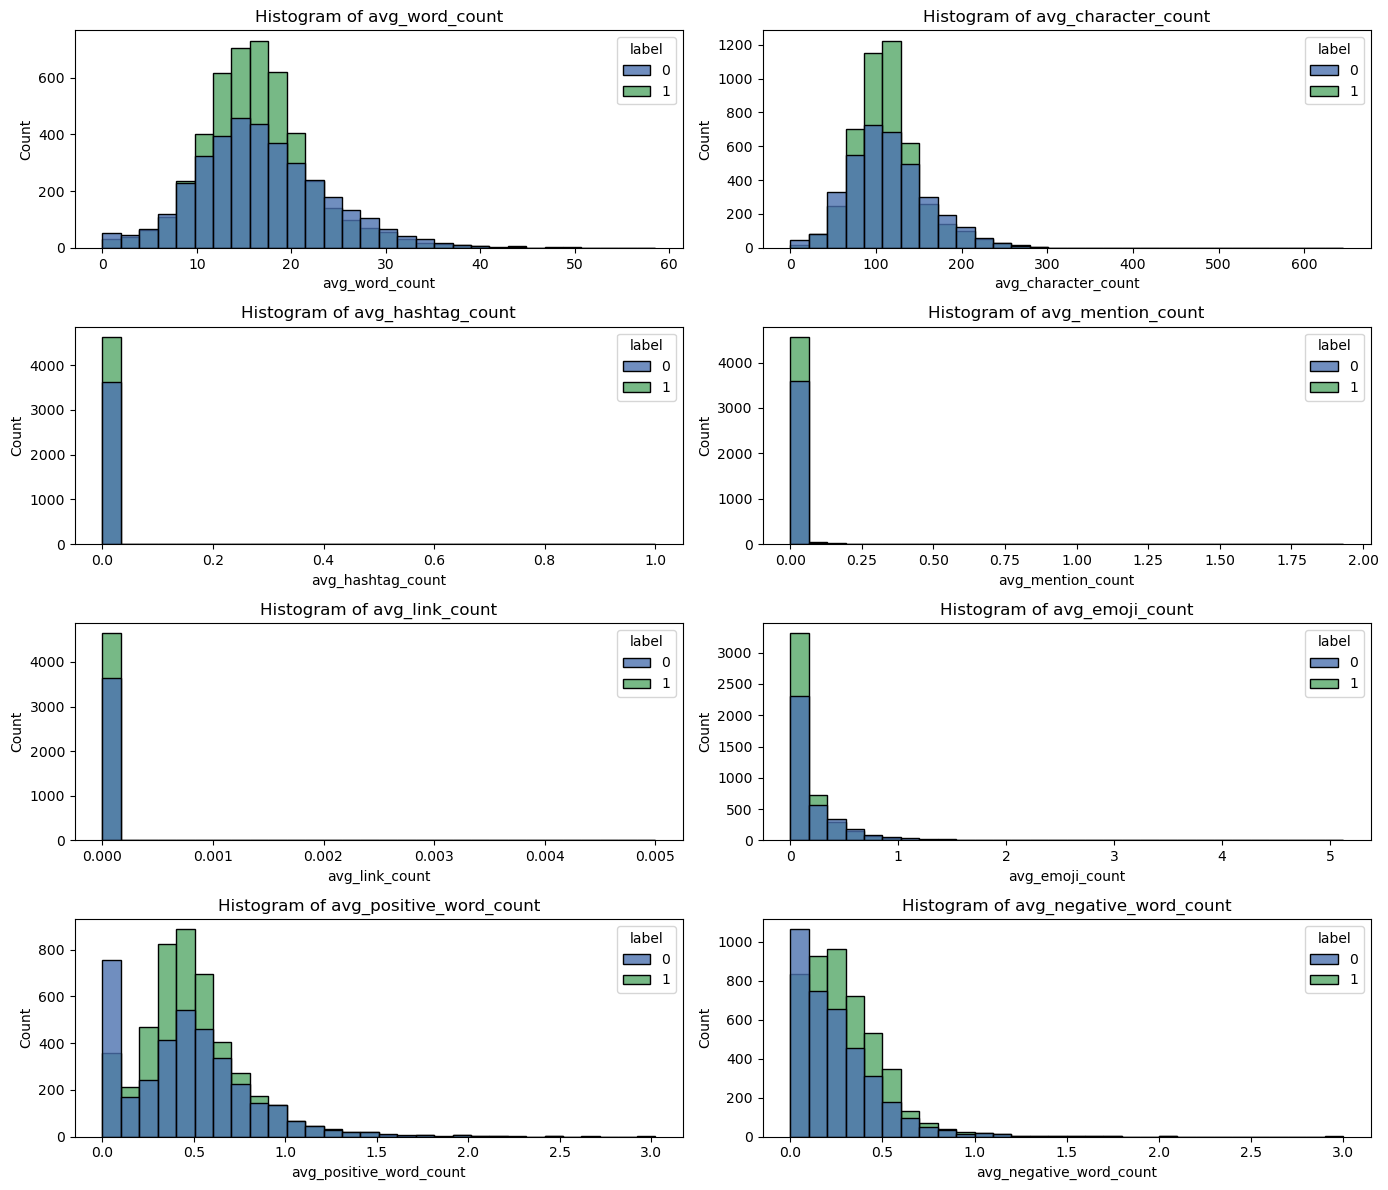

In [12]:
plot_histograms(train, by_label=True)

In [13]:
train_profile =  pd.json_normalize(train['profile'])

In [14]:
train_profile.head()

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
1,1297437077403885568,1297437077403885568,Jennifer Fishpaw,JenniferFishpaw,,None,,None,{'description': {'urls': []}},False,...,http://pbs.twimg.com/profile_images/1297437406...,https://pbs.twimg.com/profile_images/129743740...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False
2,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,http://pbs.twimg.com/profile_images/1295453225...,https://pbs.twimg.com/profile_images/129545322...,AB2316,FFFFFF,FFFFFF,666666,False,False,False,False
3,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",None,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,http://pbs.twimg.com/profile_images/1293193013...,https://pbs.twimg.com/profile_images/129319301...,0B2F8A,FFFFFF,E8EEF0,333333,True,False,False,False
4,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,http://pbs.twimg.com/profile_images/1181662400...,https://pbs.twimg.com/profile_images/118166240...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False


In [15]:
train_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  8278 non-null   object
 1   id_str                              8278 non-null   object
 2   name                                8278 non-null   object
 3   screen_name                         8278 non-null   object
 4   location                            8278 non-null   object
 5   profile_location                    8278 non-null   object
 6   description                         8278 non-null   object
 7   url                                 8278 non-null   object
 8   entities                            8278 non-null   object
 9   protected                           8278 non-null   object
 10  followers_count                     8278 non-null   object
 11  friends_count                       8278 non-null   obje

In [16]:
# TO DO
# most common bigrams, trigrams (2 words next to each other, 3 words next to each other)
# train_profile EDA (followers count per label, most common location etc )